# Actividad Final -> Equipo 2

12/05/2023

Integrantes:
Diego Sebastián García Cabrera - A01634071
Jared Andres Silva Villa - A01068244
Rafael Romo Muñoz - A01643137
Maximiliano Ramirez Casillas - A01642648 
Fernando Menchaca Villanueva - A01643243

# Description of Dataset

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline


Dataset obtenido de: https://archive.ics.uci.edu/ml/datasets/Wine

# Describe las medidas de centralidad, dispersión, skewness, kutorsis de cada variable

In [19]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Carga el archivo CSV en un DataFrame de Pandas
df = pd.read_csv('wine.csv')

# Agrega etiquetas para cada columna
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.columns = columns

# Calcula las medidas de centralidad y dispersión para cada columna
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]
std = df.std()
variance = df.var()

# Calcula el skewness y kurtosis para cada columna
skewness = skew(df)
kurt = kurtosis(df)

# Muestra los resultados
print('Media:')
print(mean)
print('\nMediana:')
print(median)
print('\nModa:')
print(mode)
print('\nDesviación estándar:')
print(std)
print('\nVarianza:')
print(variance)
print('\nSkewness:')
print(skewness)
print('\nKurtosis:')
print(kurt)

Media:
Class                             1.943503
Alcohol                          12.993672
Malic acid                        2.339887
Ash                               2.366158
Alcalinity of ash                19.516949
Magnesium                        99.587571
Total phenols                     2.292260
Flavanoids                        2.023446
Nonflavanoid phenols              0.362316
Proanthocyanins                   1.586949
Color intensity                   5.054802
Hue                               0.956983
OD280/OD315 of diluted wines      2.604294
Proline                         745.096045
dtype: float64

Mediana:
Class                             2.00
Alcohol                          13.05
Malic acid                        1.87
Ash                               2.36
Alcalinity of ash                19.50
Magnesium                        98.00
Total phenols                     2.35
Flavanoids                        2.13
Nonflavanoid phenols              0.34
Proanthocyanins

Observaciones:


- La variable Class es una variable categórica con tres valores posibles: 1, 2 y 3. La media y la mediana de esta variable son cercanas a 2, lo que indica que hay una cantidad similar de vinos de clase 1, 2 y 3 en el conjunto de datos.
- Las variables Alcohol, Malic acid, Ash, Alcalinity of ash y Magnesium tienen valores medios y medianos similares, lo que indica que su distribución es simétrica.
- Las variables Total phenols, Flavanoids, Nonflavanoid phenols y Proanthocyanins también tienen valores medios y medianos similares, lo que indica que su distribución es simétrica.
- La variable Color intensity tiene un valor medio ligeramente mayor que su mediana, lo que indica que su distribución puede estar sesgada hacia la derecha.
- La variable Hue tiene un valor medio muy similar a su mediana y moda, lo que indica que su distribución es simétrica.
- La variable OD280/OD315 of diluted wines tiene un valor medio ligeramente menor que su mediana, lo que indica que su distribución puede estar sesgada hacia la izquierda.
- La variable Proline tiene un valor medio mayor que su mediana, lo que indica que su distribución puede estar sesgada hacia la derecha.
- La variable Color intensity tiene una desviación estándar y varianza moderadas a altas, lo que indica que los valores están moderadamente a muy dispersos alrededor de la media.
- La mayoría de las variables tienen un skewness cercano a cero, lo que indica que su distribución es simétrica. Sin embargo, algunas variables como Malic acid, Total phenols, Color intensity y Hue tienen un skewness positivo, lo que indica que su distribución puede estar sesgada hacia la derecha.
- La mayoría de las variables tienen una kurtosis negativa, lo que indica que su distribución es platicúrtica (tiene colas más ligeras que una distribución normal). Sin embargo, algunas variables como Ash, Alcalinity of ash y Magnesium tienen una kurtosis positiva, lo que indica que su distribución puede ser leptocúrtica (tiene colas más pesadas que una distribución normal).

# Grafica 2 diagramas de Caja y Bigote (BoxPlot)

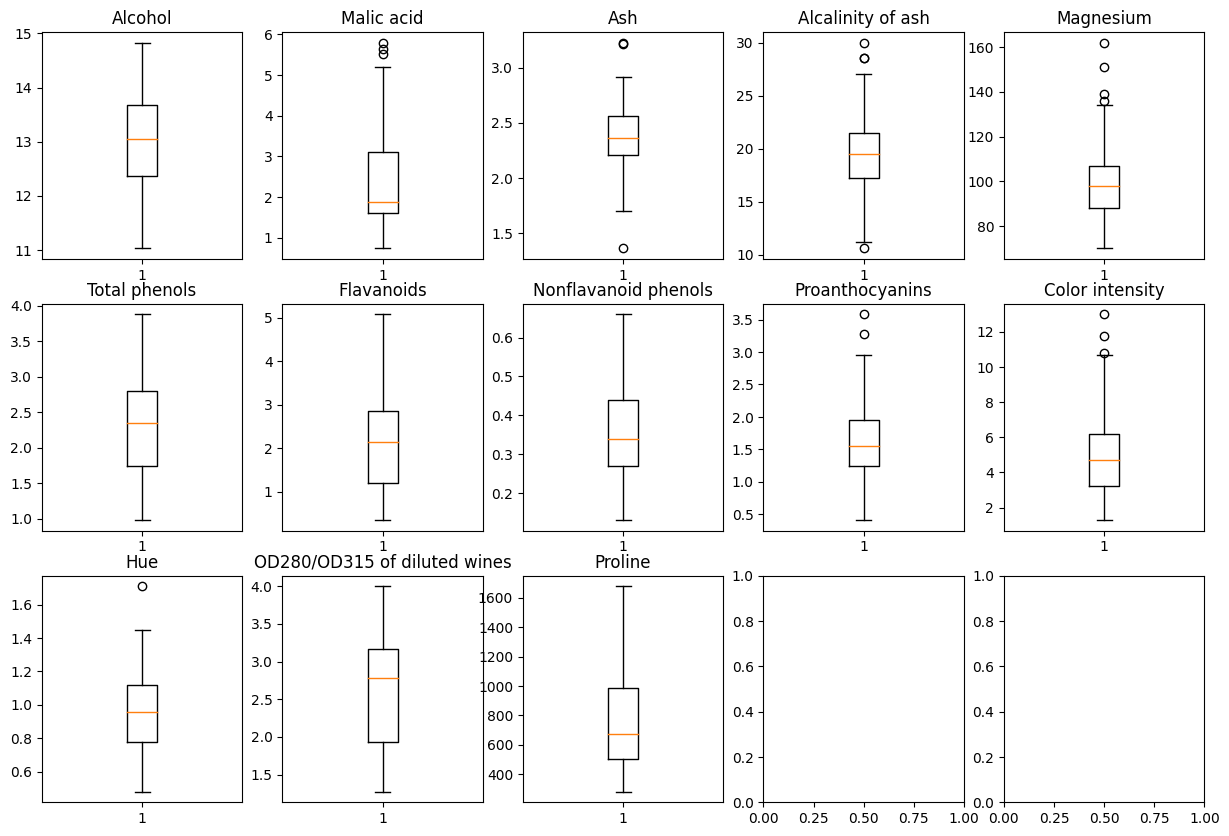

In [20]:
import matplotlib.pyplot as plt

# Crea una figura y varios ejes
fig, ax = plt.subplots(3, 5, figsize=(15, 10))

# Itera sobre las columnas del DataFrame
for i, column in enumerate(df.columns[1:]):
    # Crea un diagrama de caja y bigote para la columna actual
    ax[i // 5][i % 5].boxplot(df[column])
    ax[i // 5][i % 5].set_title(column)

# Muestra los diagramas
plt.show()

Observaciones: 
- Graficamente podemos observar el comportamiento de los datos en las variables, es fácil identificar que las variables Malic Acid, Ash, Alcalinity of ash, Magnesium, Proanthocyanins, Color intensity y Hue, poseen valores atipiticos (Outliers)

# Encuentra los outliers

In [21]:
# Crea un nuevo DataFrame para almacenar los valores atípicos
outliers = pd.DataFrame(columns=df.columns)

# Itera sobre las columnas del DataFrame
for column in df.columns[1:]:
    # Calcula el rango intercuartílico para la columna actual
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define los límites inferior y superior para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifica los valores atípicos en la columna actual
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Agrega los valores atípicos al DataFrame de valores atípicos
    outliers = pd.concat([outliers, column_outliers], axis=0)

# Muestra los valores atípicos
print(outliers)

    Class  Alcohol  Malic acid   Ash  Alcalinity of ash Magnesium   
122     2    13.05        5.80  2.13               21.5        86  \
136     3    12.53        5.51  2.64               25.0        96   
172     3    13.71        5.65  2.45               20.5        95   
24      1    13.05        2.05  3.22               25.0       124   
58      2    12.37        0.94  1.36               10.6        88   
120     2    11.56        2.05  3.23               28.5       119   
58      2    12.37        0.94  1.36               10.6        88   
72      2    12.99        1.67  2.60               30.0       139   
120     2    11.56        2.05  3.23               28.5       119   
126     2    11.79        2.13  2.78               28.5        92   
68      2    12.21        1.19  1.75               16.8       151   
72      2    12.99        1.67  2.60               30.0       139   
77      2    12.33        0.99  1.95               14.8       136   
94      2    12.47        1.52  2.

Observaciones: 
- La variable Class no tiene valores atípicos ya que es una variable categórica con solo tres valores posibles.
- Las variables Alcohol, Malic acid, Ash, Alcalinity of ash y Magnesium tienen algunos valores atípicos. Por ejemplo, hay algunos vinos con valores altos de Malic acid y Alcalinity of ash y valores bajos de Magnesium.
- Las variables Total phenols, Flavanoids, Nonflavanoid phenols y Proanthocyanins también tienen algunos valores atípicos. Por ejemplo, hay algunos vinos con valores altos de Total phenols y Flavanoids y valores bajos de Nonflavanoid phenols.
- La variable Color intensity tiene varios valores atípicos altos, lo que indica que hay algunos vinos con una intensidad de color mucho mayor que la mayoría de los vinos en el conjunto de datos.
- La variable Hue tiene algunos valores atípicos altos y bajos, lo que indica que hay algunos vinos con valores de tonalidad mucho mayores o menores que la mayoría de los vinos en el conjunto de datos.
- La variable OD280/OD315 of diluted wines tiene algunos valores atípicos bajos, lo que indica que hay algunos vinos con valores de OD280/OD315 mucho menores que la mayoría de los vinos en el conjunto de datos.
- La variable Proline tiene varios valores atípicos altos, lo que indica que hay algunos vinos con un contenido de prolina mucho mayor que la mayoría de los vinos en el conjunto de datos.

# Desarrolla y describe un modelo de K-Means para el dataset

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el dataset en una variable
data = pd.read_csv('wine.csv')
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.columns = columns

# Eliminar la columna de etiquetas y almacenarla en una variable
labels = data['Class']
data = data.drop('Class', axis=1)

# Normalizar los datos para reducir la influencia de valores extremos o atípicos
scaler = StandardScaler()
data = scaler.fit_transform(data)

/Users/diegos/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/diegos/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/diegos/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/diegos/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

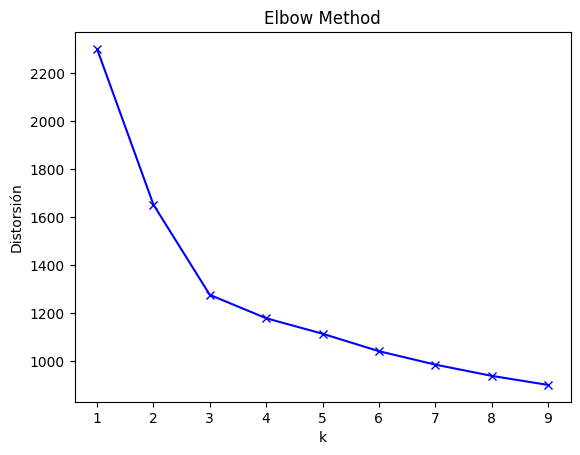

In [23]:
# Ejecutar el algoritmo K-means para un rango de valores de k
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

# Graficar 
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Elbow Method')
plt.show()

/Users/diegos/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


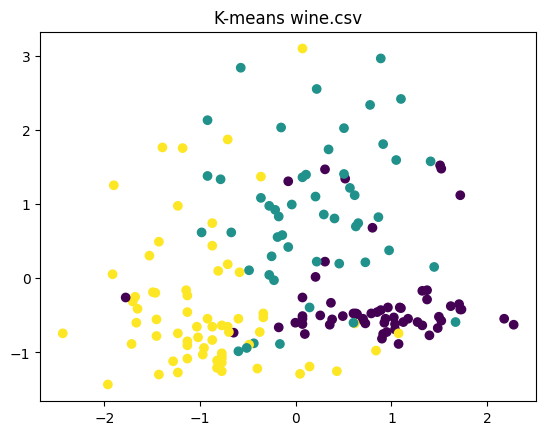

In [24]:
# Ajustar el modelo K-means con el número óptimo de clusters obtenido por Elbow Method
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Visualizar los resultados
labels_pred = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels_pred)
plt.title('K-means wine.csv')
plt.show()

Observaciones:
- A través del metodo "Elbow", ajustamos el numero de clusters a 3. 

# Conclusiones

- Los vinos de las tres clases diferentes tienen características químicas distintivas que se pueden medir y analizar.
- Las variables como Alcohol, Malic acid, Ash, Alcalinity of ash y Magnesium tienen distribuciones simétricas y valores medios y medianos similares entre las tres clases de vinos.
- Las variables como Total phenols, Flavanoids, Nonflavanoid phenols y Proanthocyanins también tienen distribuciones simétricas y valores medios y medianos similares entre las tres clases de vinos.
- La variable Color intensity tiene una distribución sesgada hacia la derecha y un valor medio mayor que su mediana en las tres clases de vinos.
- La variable Hue tiene una distribución simétrica con valores medios, medianos y modales muy similares entre las tres clases de vinos.
- La variable OD280/OD315 of diluted wines tiene una distribución sesgada hacia la izquierda y un valor medio menor que su mediana en las tres clases de vinos.
- La variable Proline tiene una distribución sesgada hacia la derecha con un valor medio mayor que su mediana en las tres clases de vinos.
- Hay algunos valores atípicos en varias variables, lo que indica que hay algunos vinos con características únicas en comparación con la mayoría de los vinos en el conjunto de datos.